In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
clfs = []
cat = pd.read_csv('catboost_799.4_817.59.csv') ; clfs.append(cat)
LGBM = pd.read_csv('lgbm_basic_811.63.csv') ; clfs.append(LGBM)
ET = pd.read_csv('ET_cv15_847.20.csv') ; clfs.append(ET)

In [4]:
data_id = cat.iloc[:,0]

In [5]:
rmses = [ 799.4329, 813.16449, 830.10452]

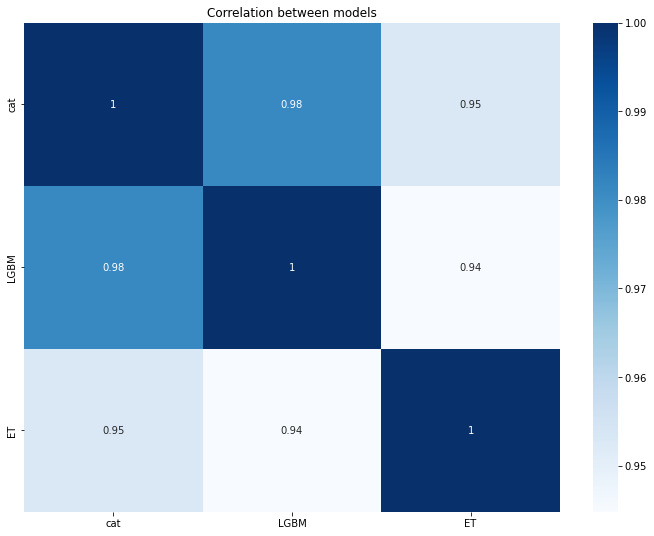

In [6]:
genders = []
for i in range(3):
    genders.append(clfs[i].iloc[:,-1])

ensemble_results = pd.concat(genders, axis=1)
col = ['cat', 'LGBM', 'ET']
ensemble_results.columns = col
plt.figure(figsize = (12,9))
g = sns.heatmap(ensemble_results.corr(),annot=True, cmap='Blues')
g.set_title("Correlation between models")
plt.show()

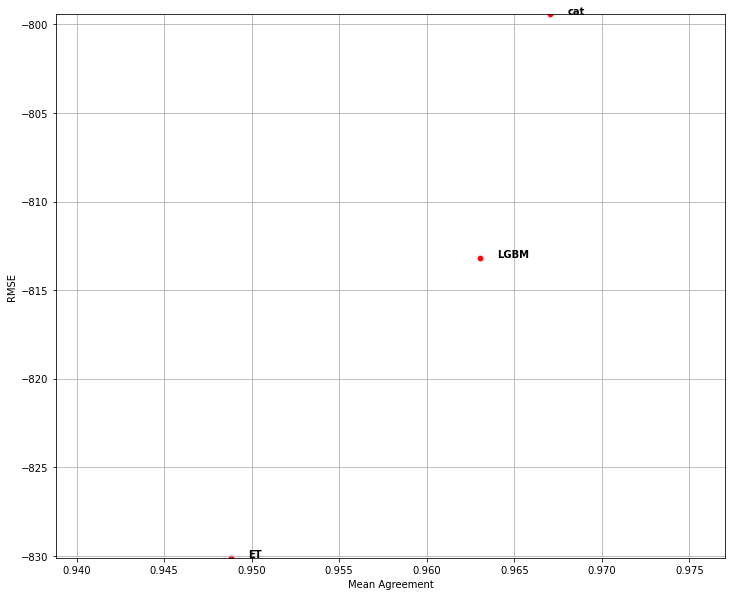

In [7]:
corr = (ensemble_results.corr().sum()-1)/(ensemble_results.corr().shape[0]-1)
names = corr.index.str[:]
aucs = [-x for x in rmses]
df = pd.DataFrame({'model': names, 'auc': aucs, 'cor': corr})        

plt.figure(figsize=(12,10))
g = sns.scatterplot(x="cor", y="auc", data=df, s=40, color='red')
for line in range(0, df.shape[0]):
     g.text(df.cor[line]+0.001, df.auc[line]-0.001, 
            df.model[line], horizontalalignment='left', 
            size='medium', color='black', weight='semibold')
        
plt.xlim((df.cor.min()-0.01,df.cor.max()+0.01))
plt.ylim((df.auc.min()-0.01,df.auc.max()+0.01))
plt.xlabel('Mean Agreement')
plt.ylabel('RMSE')
plt.grid()
plt.show()

In [26]:
col

['cat_799', 'cat_800', 'lgbm_809', 'lgbm_810', 'ET_839']

## 1)

In [10]:
weighted_average = []
for i in range(len(cat)):
    weighted_average.append(cat.iloc[i,1]*0.6 + LGBM.iloc[i,1]*0.15 + ET.iloc[i,1]*0.25)

In [11]:
c_6_L_15_E_25 = pd.DataFrame({'ID': cat.iloc[:,0], 'Salary':weighted_average})

In [12]:
c_6_L_15_E_25.to_csv('./c_6_L_15_E_25.csv',index= False)

## 2)

In [ ]:
weighted_average = []
for i in range(len(cat)):
    weighted_average.append(cat.iloc[i,1]*0.75 + ET.iloc[i,1]*0.25)

In [ ]:
C_75_E_25 = pd.DataFrame({'ID': cat.iloc[:,0], 'Salary':weighted_average})

In [ ]:
C_75_E_25 .to_csv('./a.csv',index= False)